In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import tensorflow as tf

Your goal is to classify an input image into one of the 10 classes of clothing, so you define your neural network to take as input a matrix of shape (28, 28) and output a vector of size 10, where the index of the largest value in the output corresponds to the integer label for the class of clothing in the image. For example, if you use an image of an ankle boot as input, you might get an output vector $y'$ like this:

$$
y' =
\begin{bmatrix}
  0.0000 \\
  5.3003 \\
  2.1616 \\
  1.9145 \\
  0.0000 \\
  5.1698 \\
  0.0000 \\
  2.2152 \\
  0.0000 \\
  7.0417 \\
\end{bmatrix}
$$

In this particular example, the largest value appears at index 9 (counting from zero). As you saw in the previous module, index 9 corresponds to the *Ankle Boot* category. So this indicates that your neural network correctly classified the image of an ankle boot.

Here's a visualization of the structure of the neural network you chose for this scenario:

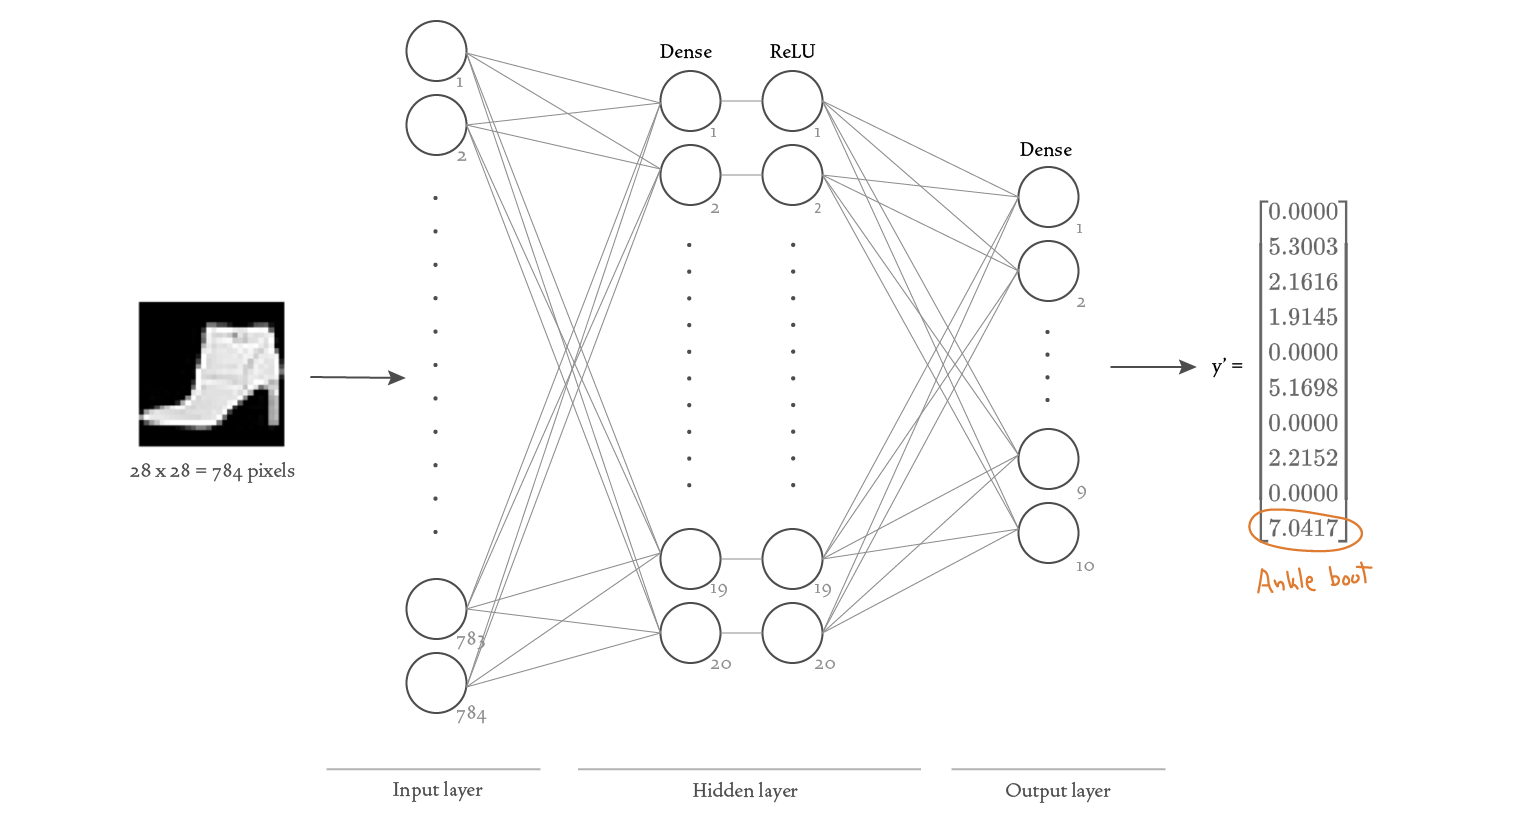

Because each image has 28 &times; 28 = 784 pixels, we need 784 nodes in the input layer (one for each pixel value). Add one hidden layer with 20 nodes and a ReLU (rectified linear unit) activation function. You want the output of your network to be a vector of size 10, therefore your output layer needs to have 10 nodes.

Here's the Keras code that defines this neural network:

In [2]:
class NeuralNetwork(tf.keras.Model):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.sequence = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(20, activation='relu'),
      tf.keras.layers.Dense(10)
    ])

  def call(self, x: tf.Tensor) -> tf.Tensor:
    y_prime = self.sequence(x)
    return y_prime

The [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) layer turns your input matrix of shape (28, 28) into a vector of size 784. The [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) layers are also known as *fully connected* or *linear* layers because they connect all nodes from the previous layer with each of their own nodes using a linear function. Notice that they specify *ReLU* as the activation. That's because you want the results of the linear mathematical operation to get passed as input to a *rectified linear unit* function, which adds non-linearity to the calculations. 

It's important to have non-linear activation functions (like the ReLU function) between linear layers, because otherwise a sequence of linear layers would be mathematically equivalent to just one layer. These activation functions give our network more expressive power, allowing it to approximate non-linear relationships between data.

The [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) class combines all the other layers. Lastly, you define the `call` method, which supplies a tensor `x` as input to the `sequence` of layers and produces the `y_prime` vector as a result.

You can print a description of your model using the `summary` method:

In [3]:
model = NeuralNetwork()
model.build((1, 28, 28))
model.summary()

Model: "neural_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 10)                15910     
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


This is all the code you need to define your neural network. Now that you have a neural network and some data, it's time to train the neural network using that data. 